In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# 파일 불러오기
with open('../../data/ba_chatgpt_df.pkl', 'rb') as f:
    df = pickle.load(f)


In [3]:
# 파일 불러오기
with open('../../data/df_not_answered.pkl', 'rb') as f:
    df_not_answered = pickle.load(f)


In [4]:
df_for_tot = df.groupby(['qna_creation_date']).sum()[['cnt']]

In [5]:
df_for_tot.head()

,cnt
qna_creation_date,
2013-11-30,9432
2013-12-01,9019
2013-12-02,16923
2013-12-03,18785
2013-12-04,19329


In [6]:
df_for_tot.loc['2022-11-30', :]

cnt    9517
Name: 2022-11-30, dtype: int64

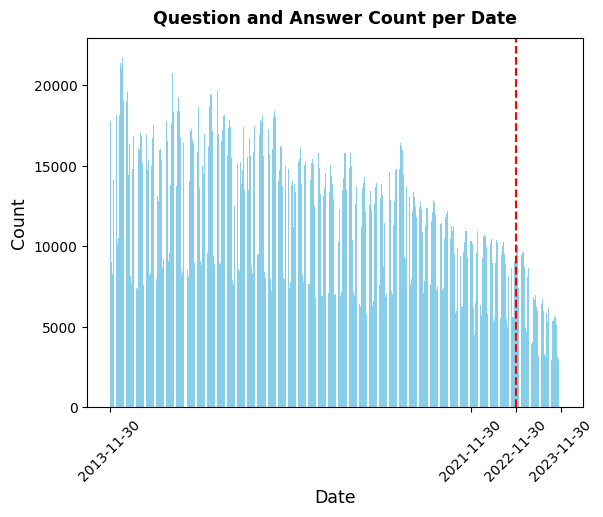

In [7]:
fig, ax = plt.subplots()

ax.bar(df_for_tot.index
    ,  height = df_for_tot['cnt']
    ,  color = 'skyblue'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Question and Answer Count per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2013-11-30','2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

In [8]:
df_for_tot[df_for_tot.index>='2020-11-30']

,cnt
qna_creation_date,
2020-11-30,11225
2020-12-01,12120
2020-12-02,12314
2020-12-03,12806
2020-12-04,11651
...,...
2023-11-25,3223
2023-11-26,3333
2023-11-27,5802


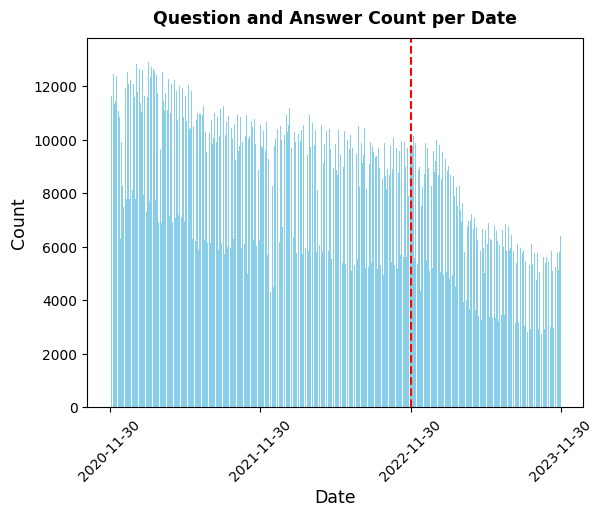

In [9]:
fig, ax = plt.subplots()

ax.bar(df_for_tot[df_for_tot.index>='2020-11-30'].index
    ,  height = df_for_tot[df_for_tot.index>='2020-11-30']['cnt']
    ,  color = 'skyblue'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Question and Answer Count per Date", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Date", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Count", # add y-axis label
              fontsize = 12.5)

major_xticks = ['2020-11-30', '2021-11-30', '2022-11-30', '2023-11-30']
ax.set_xticks(major_xticks)

ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
plt.xticks(rotation=45)
plt.show();

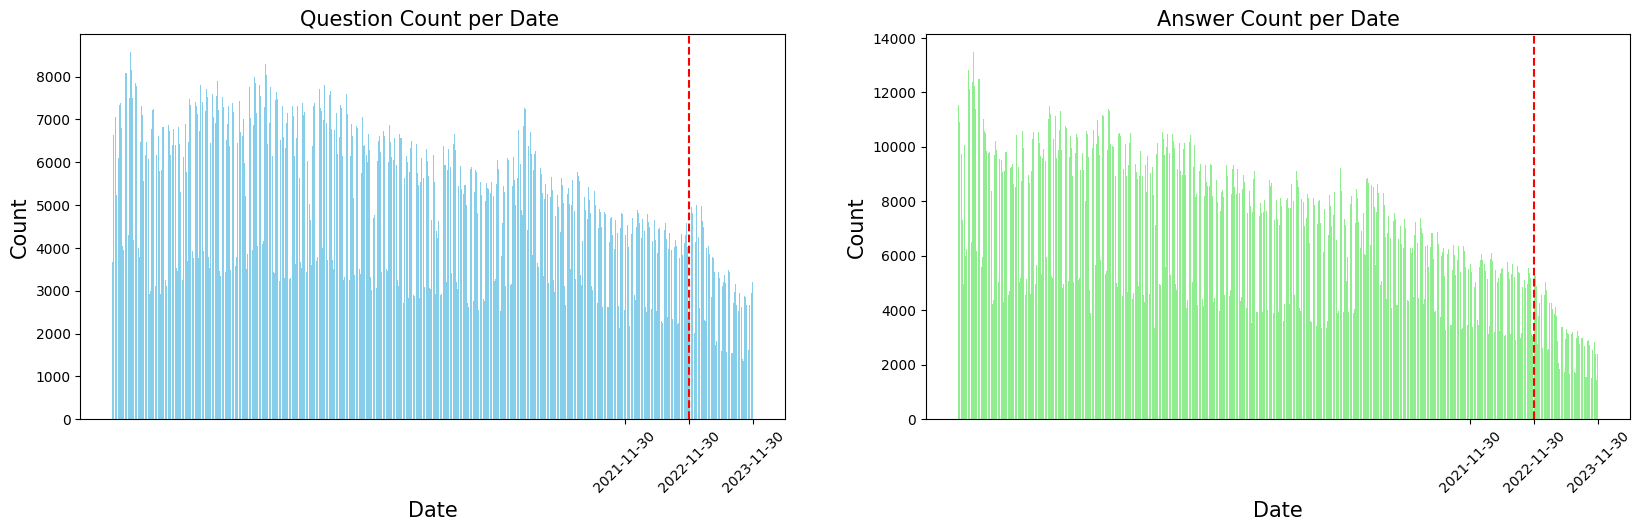

In [10]:
### create a figure with multiple subplots

fig, axs = plt.subplots(1, 2, figsize = (20, 5))
# plt.xticks(rotation=45)
major_xticks = ['2021-11-30', '2022-11-30', '2023-11-30']

axs[0].bar(df.loc[df['posttypeid']=='1', 'qna_creation_date']
        ,  df.loc[df['posttypeid']=='1', 'cnt']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type
axs[0].set_title('Question Count per Date ', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Count', fontsize = 15)
axs[0].set_xticks(major_xticks)
axs[0].axvline(major_xticks[1], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)


axs[1].bar(df.loc[df['posttypeid']=='2', 'qna_creation_date']
        ,  df.loc[df['posttypeid']=='2', 'cnt']
        ,  color = 'lightgreen'
        # ,  edgecolor = 'black'
      ) # hist type
axs[1].set_title('Answer Count per Date', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Count', fontsize = 15)
axs[1].set_xticks(major_xticks)
axs[1].axvline(major_xticks[1], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)


plt.show();

In [11]:
df_for_tot_rset = df_for_tot.reset_index()

In [12]:
df_for_tot_rset['weekday_nm'] = pd.to_datetime(df_for_tot_rset['qna_creation_date']).dt.day_name()
df_for_tot_rset['weekday'] = pd.to_datetime(df_for_tot_rset['qna_creation_date']).dt.weekday

In [13]:
df_for_tot_rset

,qna_creation_date,cnt,weekday_nm,weekday
0,2013-11-30,9432,Saturday,5
1,2013-12-01,9019,Sunday,6
2,2013-12-02,16923,Monday,0
3,2013-12-03,18785,Tuesday,1
4,2013-12-04,19329,Wednesday,2
...,...,...,...,...
3647,2023-11-25,3223,Saturday,5
3648,2023-11-26,3333,Sunday,6
3649,2023-11-27,5802,Monday,0
3650,2023-11-28,6225,Tuesday,1


In [14]:
df_weekday_mean = df_for_tot_rset.groupby(['weekday_nm', 'weekday']).mean([['cnt']]).reset_index()

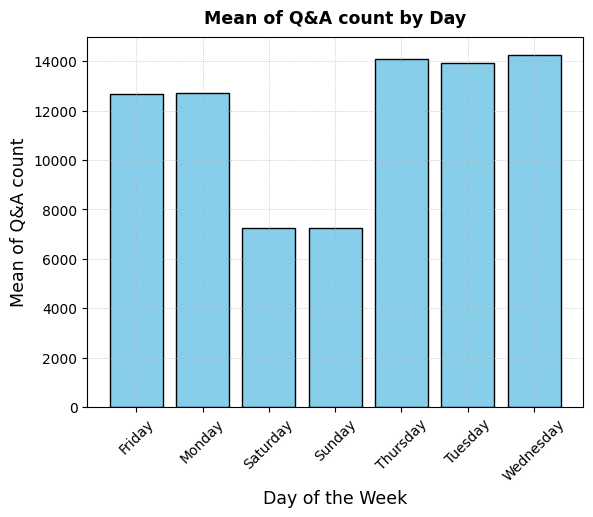

In [15]:
fig, ax = plt.subplots()

ax.bar(df_weekday_mean.weekday_nm
    ,  height = df_weekday_mean['cnt']
    ,  color = 'skyblue'
    ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Mean of Q&A count by Day", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Day of the Week", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Mean of Q&A count", # add y-axis label
              fontsize = 12.5)

label_list = list(df_weekday_mean['weekday_nm'])
tick_values = np.arange(len(label_list))
ax.set_xticks(ticks = tick_values ,labels = label_list, rotation =45)


# fig.text(0.7, 0.76, color = 'red', fontsize = 12.5,  s='Mean: ' + str(round(np.mean(viewcount_df['ViewCount_question']), 2))) #
# fig.text(0.41, 0.77, s='pct_change: ' + str(decrease_2122)) #
# fig.text(0.66, 0.65, s='pct_change: ' + str(decrease_2223)) #

ax.grid(True, linestyle = ':', linewidth = 0.5) # add grid

plt.show();

In [16]:
df_not_answered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223203 entries, 0 to 5223202
Data columns (total 3 columns):
 #   Column          Dtype         
---  ------          -----         
 0   q_id            int64         
 1   q_creationdate  datetime64[ns]
 2   a_id            float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 119.5 MB


In [17]:
df_not_answeredviz = df_not_answered[['q_id', 'q_creationdate', 'a_id']]

In [18]:
df_not_answeredviz['dt'] = pd.to_datetime(df_not_answeredviz['q_creationdate']).dt.date
df_not_answeredviz['dt'] = df_not_answeredviz['dt'].astype('str')

In [19]:
df_tot_q = df_not_answeredviz.groupby('dt').count()[['q_id']].reset_index()

In [20]:
df_not_a = df_not_answeredviz[df_not_answeredviz['a_id'].isna()].groupby('dt').count()[['q_id']].reset_index()

In [21]:
df_totq_nota = pd.merge(df_tot_q, df_not_a, on ='dt', how='left')

In [22]:
df_totq_nota.columns = ['dt', 'totq', 'nota']

In [23]:
df_totq_nota['nota_rate'] = np.round(df_totq_nota['nota']/df_totq_nota['totq']*100, 3)
df_totq_nota['a_rate'] = 100- df_totq_nota['nota_rate']

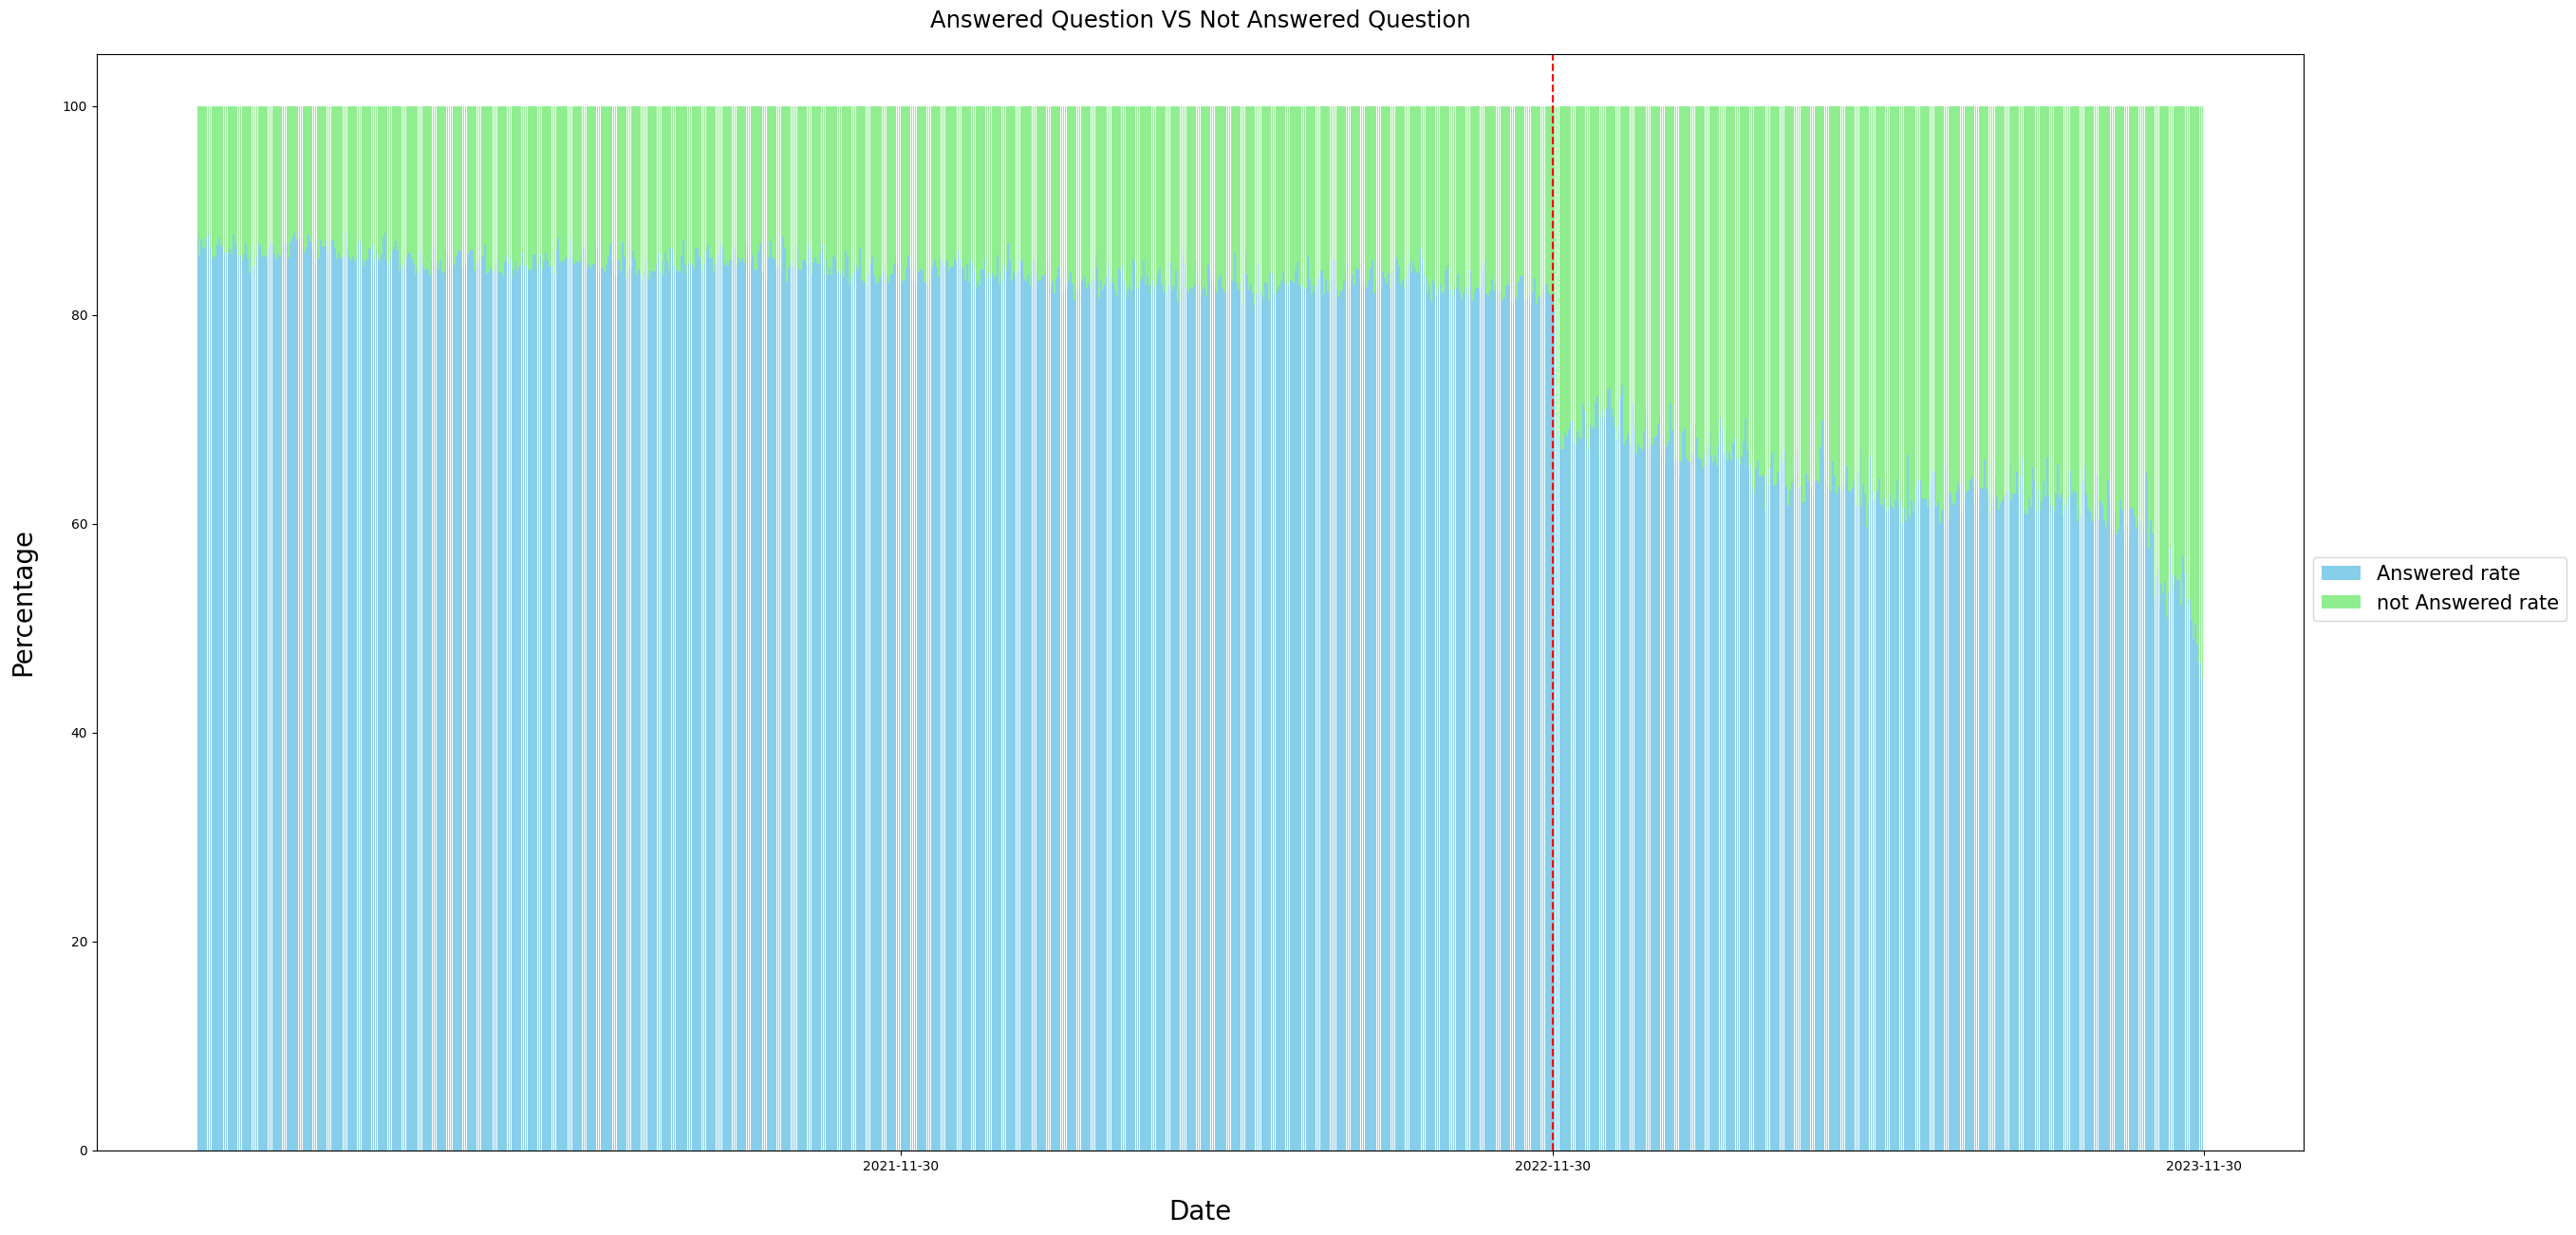

In [30]:
fig, ax = plt.subplots(figsize = (30, 15))

ax.bar(df_totq_nota['dt'], df_totq_nota['a_rate'], color='skyblue', label = 'Answered rate')
ax.bar(df_totq_nota['dt'], df_totq_nota['nota_rate'], bottom = df_totq_nota['a_rate'], color = 'lightgreen', label = 'not Answered rate')

ax.set_xlabel('Date', fontsize = 20, labelpad = 20)
ax.set_ylabel('Percentage', fontsize = 20, labelpad = 20)
ax.set_title('Answered Question VS Not Answered Question', fontsize = 17.5, pad = 20)
ax.set_xticks(major_xticks)
# ax.tick_params(axis = 'both', labelsize = 17.5)

ax.legend( title_fontsize = 15, fontsize = 15,
          bbox_to_anchor = (1, 0.55))


ax.axvline('2022-11-30', # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

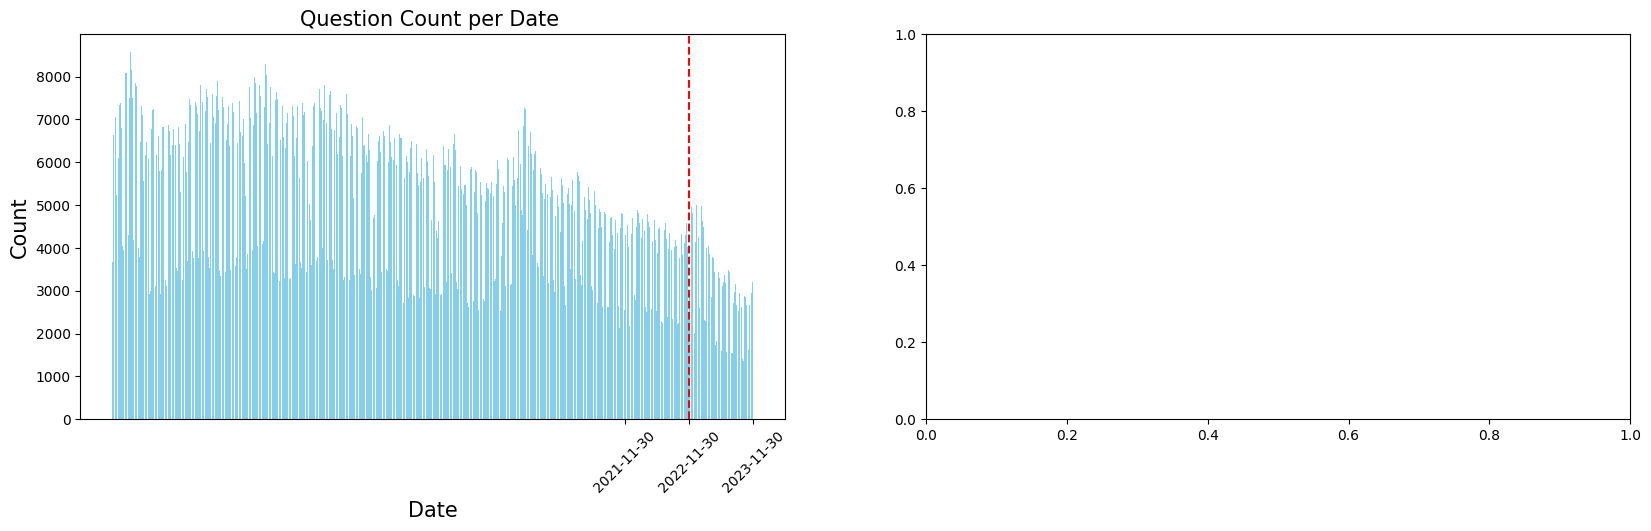

In [27]:
### create a figure with multiple subplots

fig, axs = plt.subplots(1,2,  figsize = (20, 5))
# plt.xticks(rotation=45)
major_xticks = ['2021-11-30', '2022-11-30', '2023-11-30']

upper = df_totq_nota['nota_rate'].values
bottom = df_totq_nota['a_rate'].values 
axs[0].bar(df.loc[df['posttypeid']=='1', 'qna_creation_date']
        ,  df.loc[df['posttypeid']=='1', 'cnt']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type
axs[0].set_title('Question Count per Date ', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Count', fontsize = 15)
axs[0].set_xticks(major_xticks)
axs[0].axvline(major_xticks[1], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)


plt.show();